In [2]:
import matplotlib.pyplot as plt
import getData
from natsort import natsorted
import cv2
import numpy as np


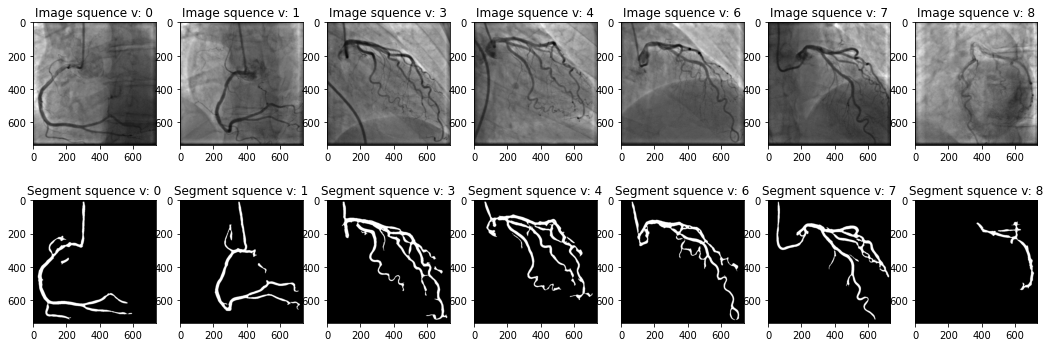

In [3]:
versions = ["0", "1", "3", "4", "6", "7", "8"]

plt.figure(figsize=(18, 6))
for v in range(len(versions)):
  a, b, aa, bb, aaa, bbb = getData.getTestValTrainSplit(versions[v])
  images = a + aa +aaa
  segs = b + bb + bbb

  sortedimg = natsorted(images)
  sortedseg = natsorted(segs)

  img = cv2.imread(sortedimg[len(sortedimg)-1],0)
  seg = cv2.imread(sortedseg[len(sortedseg)-1], 0)

  plt.subplot(2, 7, (v + 1))
  plt.title("Image squence v: " + versions[v])
  plt.imshow(img, "gray")
  plt.subplot(2, 7, v+1+7)
  plt.title("Segment squence v: " +  versions[v])
  plt.imshow(seg,"gray")

plt.show()


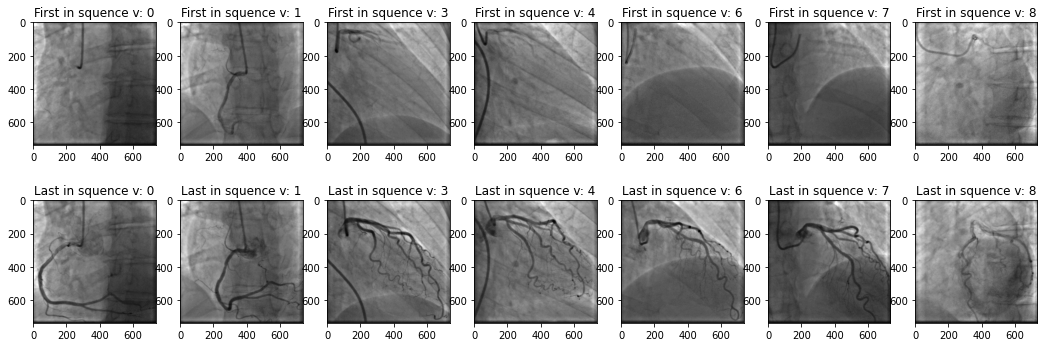

In [4]:
versions = ["0", "1", "3", "4", "6", "7", "8"]

plt.figure(figsize=(18, 6))
for v in range(len(versions)):
  a, b, aa, bb, aaa, bbb = getData.getTestValTrainSplit(versions[v])
  images = a + aa + aaa
  segs = b + bb + bbb

  sortedimg = natsorted(images)
  sortedseg = natsorted(segs)

  img = cv2.imread(sortedimg[0], 0)
  img2 = cv2.imread(sortedimg[len(sortedseg)-1], 0)

  plt.subplot(2, 7, (v + 1))
  plt.title("First in squence v: " + versions[v])
  plt.imshow(img, "gray")
  plt.subplot(2, 7, v+1+7)
  plt.title("Last in squence v: " + versions[v])
  plt.imshow(img2, "gray")

plt.show()


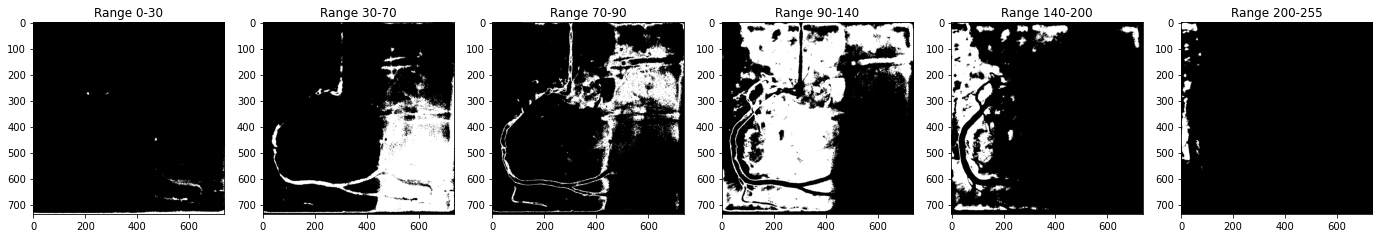

In [36]:
#thresholds for first image
a, b, aa, bb, aaa, bbb = getData.getTestValTrainSplit(versions[0])
images = a + aa + aaa
segs = b + bb + bbb
sortedimg = natsorted(images)
sortedseg = natsorted(segs)

img = cv2.imread(sortedimg[len(sortedimg)-1],0)


mask0 = (img < 30)
mask1 = (img > 0)

mask2 = (img< 70)
mask3 = (img > 30)

mask4 = img <90
mask5 = img >70

mask6 = img < 140
mask7 = img > 90

mask8 = (img < 200)
mask9 = (img > 140)

mask10 = img < 256
mask11 = img > 200

plt.figure(figsize=(24,8))
plt.subplot(1,6,1)
plt.title("Range 0-30")
plt.imshow(mask0 == mask1, "gray")
plt.subplot(1, 6, 2)
plt.title("Range 30-70")
plt.imshow(mask2 == mask3, "gray")
plt.subplot(1, 6, 3)
plt.title("Range 70-90")
plt.imshow(mask4 == mask5, "gray")
plt.subplot(1, 6, 4)
plt.title("Range 90-140")
plt.imshow(mask6 == mask7, "gray")
plt.subplot(1, 6, 5)
plt.title("Range 140-200")
plt.imshow(mask8 == mask9, "gray")
plt.subplot(1, 6, 6)
plt.title("Range 200-255")
plt.imshow(mask10 == mask11, "gray")
plt.show()


[[6.000e+00]
 [0.000e+00]
 [3.500e+01]
 [5.600e+01]
 [5.100e+01]
 [1.170e+02]
 [9.700e+01]
 [1.780e+02]
 [2.110e+02]
 [2.270e+02]
 [2.970e+02]
 [2.700e+02]
 [2.580e+02]
 [0.000e+00]
 [2.680e+02]
 [2.650e+02]
 [2.520e+02]
 [2.480e+02]
 [1.950e+02]
 [2.050e+02]
 [2.020e+02]
 [2.710e+02]
 [2.610e+02]
 [2.790e+02]
 [3.210e+02]
 [2.880e+02]
 [4.540e+02]
 [5.300e+02]
 [6.010e+02]
 [6.800e+02]
 [7.320e+02]
 [9.250e+02]
 [9.710e+02]
 [1.054e+03]
 [1.206e+03]
 [1.243e+03]
 [1.392e+03]
 [1.631e+03]
 [0.000e+00]
 [1.796e+03]
 [2.003e+03]
 [2.163e+03]
 [2.342e+03]
 [2.545e+03]
 [2.751e+03]
 [3.038e+03]
 [3.519e+03]
 [3.669e+03]
 [3.638e+03]
 [4.028e+03]
 [4.323e+03]
 [4.530e+03]
 [4.616e+03]
 [4.719e+03]
 [4.940e+03]
 [4.851e+03]
 [4.985e+03]
 [4.894e+03]
 [4.604e+03]
 [4.789e+03]
 [4.646e+03]
 [4.689e+03]
 [4.403e+03]
 [4.369e+03]
 [0.000e+00]
 [4.321e+03]
 [4.102e+03]
 [4.169e+03]
 [3.912e+03]
 [3.626e+03]
 [3.623e+03]
 [3.696e+03]
 [3.639e+03]
 [3.600e+03]
 [3.718e+03]
 [4.070e+03]
 [4.034e+03]

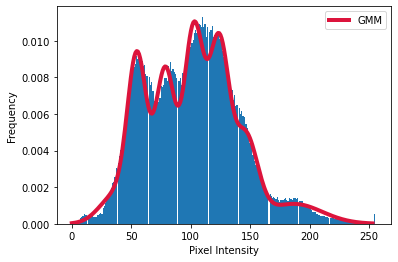

In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Read image
img = cv2.imread(sortedimg[len(sortedimg)-1], 0)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
#hist[0] = 0     # Removes background pixels
print(hist)

data = img.ravel()
data = data[data != 0]
data = data[data != 1]  # Removes background pixels (intensities 0 and 1)

# Fit GMM
gmm = GaussianMixture(n_components=7)
gmm = gmm.fit(X=np.expand_dims(data, 1))

# Evaluate GMM
gmm_x = np.linspace(0, 253, 256)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1, 1)))


# Plot histograms and gaussian curves
fig, ax = plt.subplots()
ax.hist(img.ravel(), 255, [2, 256], density=True,stacked=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")

ax.set_ylabel("Frequency")
ax.set_xlabel("Pixel Intensity")

plt.legend()

plt.show()


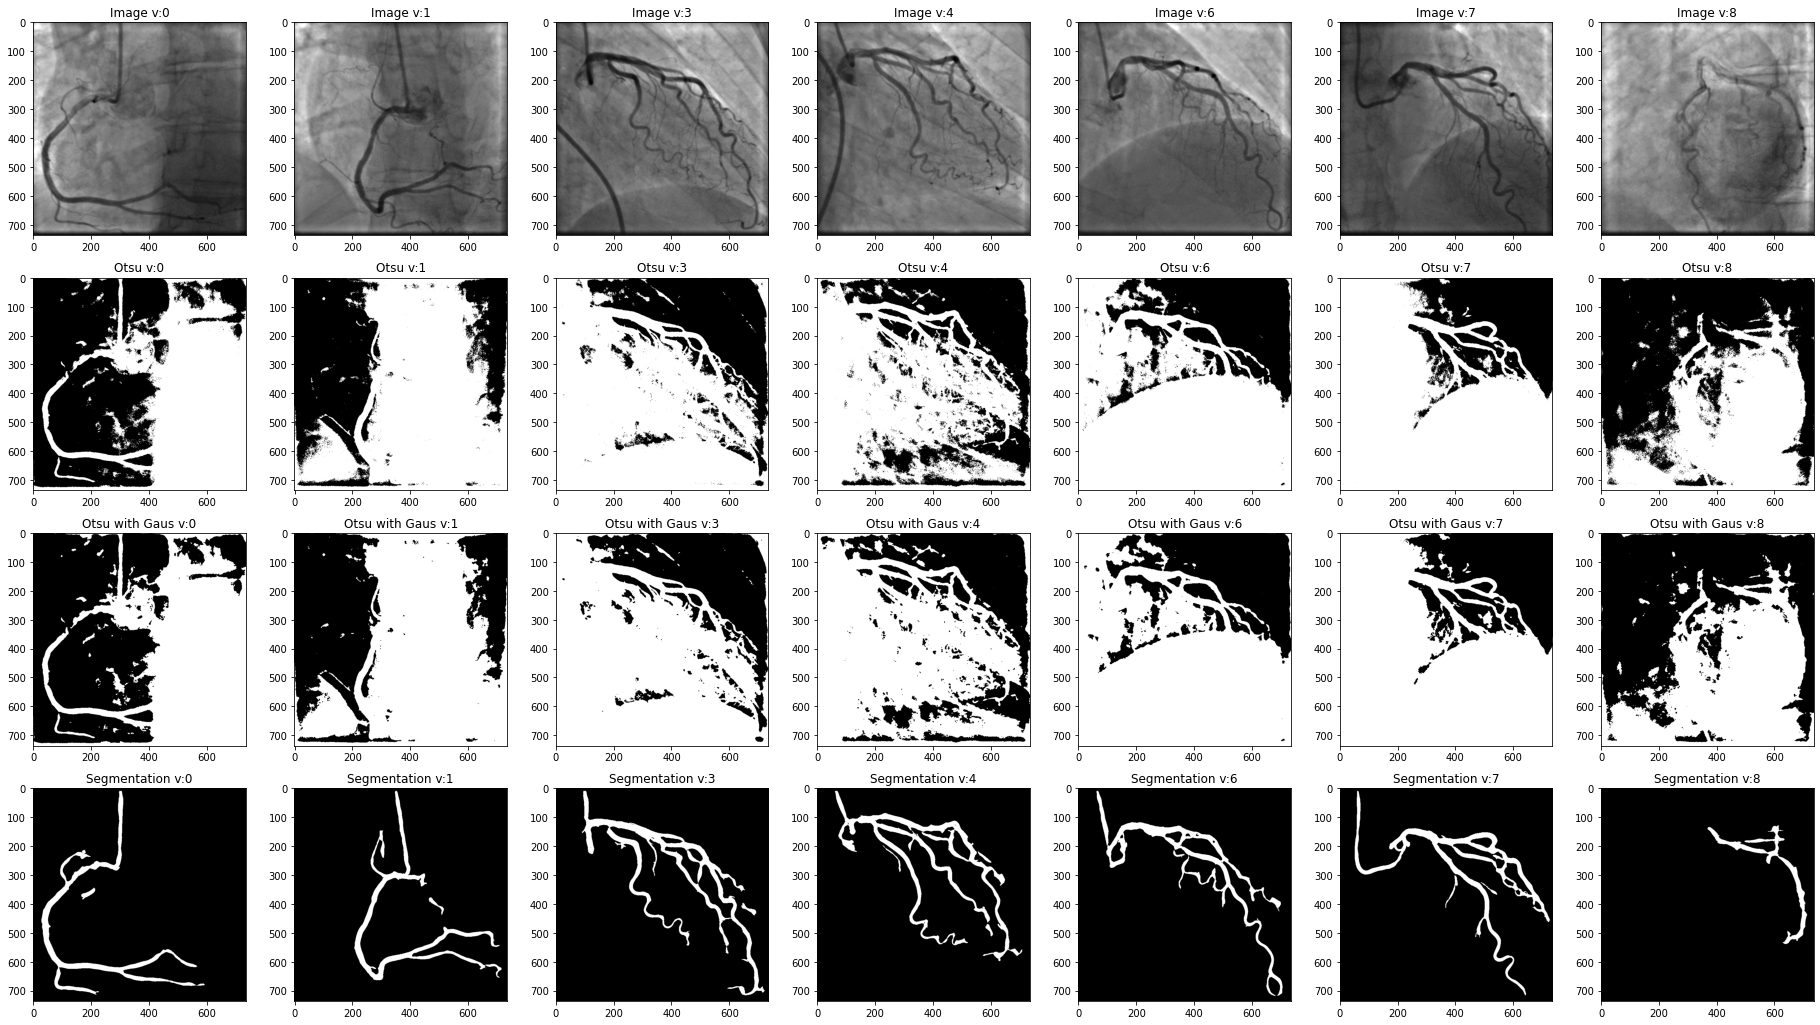

In [54]:
#create for all versions:
versions = ["0", "1", "3", "4", "6", "7", "8"]

plt.figure(figsize=(32, 18))
for v in range(len(versions)):
  #get test data
  a, b, aa, bb, aaa, bbb = getData.getTestValTrainSplit(versions[v])
  images = a + aa + aaa
  segs = b + bb + bbb
  sortedimg = natsorted(images)
  sortedseg = natsorted(segs)

  #get thresholds
  all_threshold = []
  all_otsu = []
  all_otsuGaus = []

  img = cv2.imread(sortedimg[len(sortedimg)-1], 0)
  # global thresholding
  #ret1, th1 = cv.threshold(img, 95, 255, cv.THRESH_BINARY)  # 127
  # Otsu's thresholding
  ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  # Otsu's thresholding after Gaussian filtering
  blur = cv2.GaussianBlur(img, (5, 5), 0)
  ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  #all_threshold.append(th1)
  all_otsu.append(th2)
  all_otsuGaus.append(th3)

  #plot
  
  img = cv2.imread(sortedimg[len(sortedimg)-1], 0)
  seg = cv2.imread(sortedseg[len(sortedimg)-1], 0)

  #
  plt.subplot(4, 7, v +1)
  plt.title("Image v:" + versions[v])
  plt.imshow(img, "gray")
  plt.subplot(4, 7, v + 1 +7)
  plt.title("Otsu v:" + versions[v])
  plt.imshow(np.invert(th2), "gray")
  plt.subplot(4, 7, v+1+14)
  plt.title("Otsu with Gaus v:" + versions[v])
  plt.imshow(np.invert(th3), "gray")
  plt.subplot(4, 7, v+1+21)
  plt.title("Segmentation v:" + versions[v])
  plt.imshow(seg, "gray")

plt.show()

